Finding closest centroids.
Closest centroids for the first 3 examples: 
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)
Program paused. Press ENTER to continue
Computing centroids means.
Centroids computed after initial finding of closest centroids: 
[[ 2.428301  3.157924]
 [ 5.813503  2.633656]
 [ 7.119387  3.616684]]
the centroids should be
[[ 2.428301 3.157924 ]
 [ 5.813503 2.633656 ]
 [ 7.119387 3.616684 ]]
Program paused. Press ENTER to continue
Running K-Means Clustering on example dataset.
K-Means iteration 1/10
Press ENTER to continue
K-Means iteration 2/10
Press ENTER to continue
K-Means iteration 3/10
Press ENTER to continue
K-Means iteration 4/10
Press ENTER to continue
K-Means iteration 5/10
Press ENTER to continue
K-Means iteration 6/10
Press ENTER to continue
K-Means iteration 7/10
Press ENTER to continue
K-Means iteration 8/10
Press ENTER to continue
K-Means iteration 9/10
Press ENTER to continue
K-Means iteration 10/10
Press ENTER to continue
K-Means Done

''

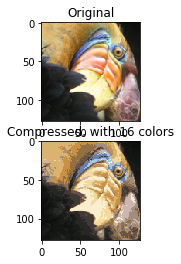

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
from skimage import io
from skimage import img_as_float

import runkMeans as km
import findClosestCentroids as fc
import computeCentroids as cc
import kMeansInitCentroids as kmic

plt.ion()
np.set_printoptions(formatter={'float': '{: 0.6f}'.format})

# ===================== Part 1: Find Closest Centroids =====================
# To help you implement K-means, we have divided the learning algorithm
# into two functions -- find_closest_centroids and compute_centroids. In this
# part, you should complete the code in the findClosestCentroids.py
#

print('Finding closest centroids.')

# Load an example dataset that we will be using
data = scio.loadmat('ex7data2.mat')
X = data['X']

# Select an initial set of centroids
k = 3  # Three centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the
# initial_centroids
idx = fc.find_closest_centroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: ')
print('{}'.format(idx[0:3]))
print('(the closest centroids should be 0, 2, 1 respectively)')

input('Program paused. Press ENTER to continue')
# ===================== Part 2: Compute Means =====================
# After implementing the closest centroids function, you should now
# complete the compute_centroids function.
#

print('Computing centroids means.')

# Compute means based on the closest centroids found in the previous part.
centroids = cc.compute_centroids(X, idx, k)

print('Centroids computed after initial finding of closest centroids: \n{}'.format(centroids))
print('the centroids should be')
print('[[ 2.428301 3.157924 ]')
print(' [ 5.813503 2.633656 ]')
print(' [ 7.119387 3.616684 ]]')

input('Program paused. Press ENTER to continue')

# ===================== Part 3: K-Means Clustering =====================
# After you have completed the two functions compute_centroids and
# find_closest_centroids, you will have all the necessary pieces to run the
# kMeans algorithm. In this part, you will run the K-Means algorithm on
# the example dataset we have provided.
#
print('Running K-Means Clustering on example dataset.')

# Load an example dataset
data = scio.loadmat('ex7data2.mat')
X = data['X']

# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx = km.run_kmeans(X, initial_centroids, max_iters, True)
print('K-Means Done.')

input('Program paused. Press ENTER to continue')

# ===================== Part 4: K-Means Clustering on Pixels =====================
#  In this exercise, you will use K-Means to compress an image. To do this,
#  you will first run K-Means on the colors of the pixels in the image and
#  then you will map each pixel onto its closest centroid.
#
#  You should now complete the code in kMeansInitCentroids.m
#
print('Running K-Means clustering on pixels from an image')

# Load an image of a bird
image = io.imread('bird_small.png')
image = img_as_float(image)

# Size of the image
img_shape = image.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.

X = image.reshape(img_shape[0] * img_shape[1], 3)

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# When using K-Means, it is important the initialize the centroids
# randomly.
# You should complete the code in kMeansInitCentroids.py before proceeding
initial_centroids = kmic.kmeans_init_centroids(X, K)

# Run K-Means
centroids, idx = km.run_kmeans(X, initial_centroids, max_iters, False)
print('K-Means Done.')

input('Program paused. Press ENTER to continue')

# ===================== Part 5: Image Compression =====================
# In this part of the exercise, you will use the clusters of K-Means to
# compress an image. To do this, we first find the closest clusters for
# each example.
print('Applying K-Means to compress an image.')

# Find closest cluster members
idx = fc.find_closest_centroids(X, centroids)

# Essentially, now we have represented the image X as in terms of the
# indices in idx.

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
X_recovered = centroids[idx]

# Reshape the recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, (img_shape[0], img_shape[1], 3))

plt.subplot(2, 1, 1)
plt.imshow(image)
plt.title('Original')

plt.subplot(2, 1, 2)
plt.imshow(X_recovered)
plt.title('Compressed, with {} colors'.format(K))

input('ex7 Finished. Press ENTER to exit')



Visualizing example dataset for PCA.
Program paused. Press ENTER to continue
Running PCA on example dataset.
Top eigenvector: 
U[:, 0] = [-0.707107 -0.707107]
You should expect to see [-0.707107 -0.707107]
Program paused. Press ENTER to continue
Dimension reductino on example dataset.
Projection of the first example: [ 1.481274]
(this value should be about 1.481274)
Approximation of the first example: [-1.047419 -1.047419]
(this value should be about [-1.047419 -1.047419])
Program paused. Press ENTER to continue
Loading face dataset.
Program paused. Press ENTER to continue
Running PCA on face dataset.
(this might take a minute or two ...)
Program paused. Press ENTER to continue
Dimension reduction for face dataset.
The projected data Z has a shape of: (5000, 100)
Program paused. Press ENTER to continue
Visualizing the projected (reduced dimension) faces.
Program paused. Press ENTER to continue
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K

''

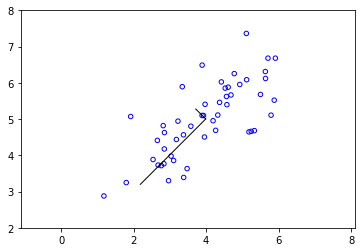

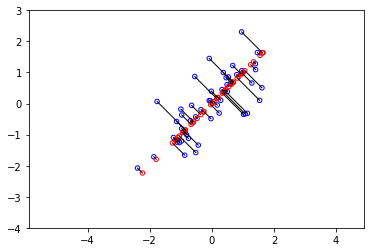

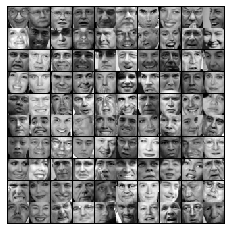

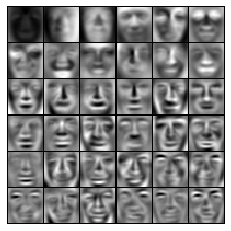

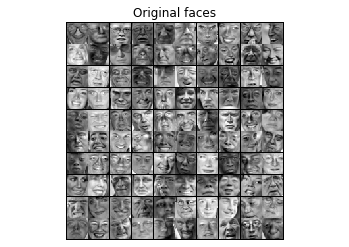

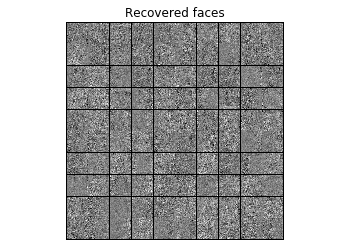

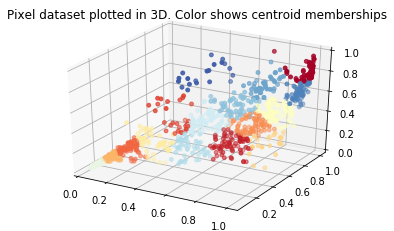

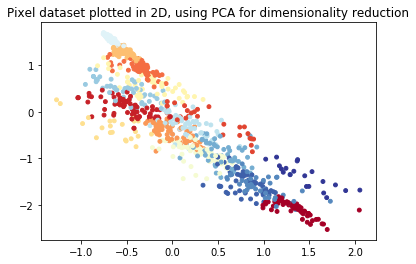

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
from mpl_toolkits.mplot3d import Axes3D
from skimage import io
from skimage import img_as_float
import featureNormalize as fn
import pca as pca
import runkMeans as rk
import projectData as pd
import recoverData as rd
import displayData as disp
import kMeansInitCentroids as kmic
import runkMeans as km

plt.ion()
np.set_printoptions(formatter={'float': '{: 0.6f}'.format})

# ===================== Part 1: Load Example Dataset =====================
# We start this exercise by using a small dataset that is easily to
# visualize
#
print('Visualizing example dataset for PCA.')

# The following command loads the dataset.
data = scio.loadmat('ex7data1.mat')
X = data['X']

# Visualize the example dataset
plt.figure()
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='b', s=20)
plt.axis('equal')
plt.axis([0.5, 6.5, 2, 8])

input('Program paused. Press ENTER to continue')

# ===================== Part 2: Principal Component Analysis =====================
# You should now implement PCA, a dimension reduction technique. You
# should complete the code in pca.py
#
print('Running PCA on example dataset.')

# Before running PCA, it is important to first normalize X
X_norm, mu, sigma = fn.feature_normalize(X)

# Run PCA
U, S = pca.pca(X_norm)

rk.draw_line(mu, mu + 1.5 * S[0] * U[:, 0])
rk.draw_line(mu, mu + 1.5 * S[1] * U[:, 1])

print('Top eigenvector: \nU[:, 0] = {}'.format(U[:, 0]))
print('You should expect to see [-0.707107 -0.707107]')

input('Program paused. Press ENTER to continue')

# ===================== Part 3: Dimension Reduction =====================
# You should now implement the projection step to map the data onto the
# first k eigenvectors. The code will then plot the data in this reduced
# dimensional space. This will show you what the data looks like when
# using only the correspoding eigenvectors to reconstruct it.
#
# You should complete the code in projectData.py
#
print('Dimension reductino on example dataset.')

# Plot the normalized dataset (returned from pca)
plt.figure()
plt.scatter(X_norm[:, 0], X_norm[:, 1], facecolors='none', edgecolors='b', s=20)
plt.axis('equal')
plt.axis([-4, 3, -4, 3])

# Project the data onto K = 1 dimension
K = 1
Z = pd.project_data(X_norm, U, K)
print('Projection of the first example: {}'.format(Z[0]))
print('(this value should be about 1.481274)')

X_rec = rd.recover_data(Z, U, K)

print('Approximation of the first example: {}'.format(X_rec[0]))
print('(this value should be about [-1.047419 -1.047419])')

# Draw lines connecting the projected points to the original points
plt.scatter(X_rec[:, 0], X_rec[:, 1], facecolors='none', edgecolors='r', s=20)
for i in range(X_norm.shape[0]):
    rk.draw_line(X_norm[i], X_rec[i])

input('Program paused. Press ENTER to continue')

# ===================== Part 4: Loading and Visualizing Face Data =====================
# We start the exercise by first loading and visualizing the dataset.
# The following code will load the dataset into your environment
#
print('Loading face dataset.')

# Load Face dataset
data = scio.loadmat('ex7faces.mat')
X = data['X']

disp.display_data(X[0:100])

input('Program paused. Press ENTER to continue')

# ===================== Part 5: PCA on Face Data: Eigenfaces =====================
# Run PCA and visualize the eigenvectors which are in this case eigenfaces
# We display the first 36 eigenfaces.
#
print('Running PCA on face dataset.\n(this might take a minute or two ...)')

# Before running PCA, it is important to first normalize X by subtracting
# the mean value from each feature
X_norm, mu, sigma = fn.feature_normalize(X)

# Run PCA
U, S = pca.pca(X_norm)

# Visualize the top 36 eigenvectors found
disp.display_data(U[:, 0:36].T)

input('Program paused. Press ENTER to continue')

# ===================== Part 6: Dimension Reduction for Faces =====================
# Project images to the eigen space using the top k eigenvectors
# If you are applying a machine learning algorithm
print('Dimension reduction for face dataset.')

K = 100
Z = pd.project_data(X_norm, U, K)

print('The projected data Z has a shape of: {}'.format(Z.shape))

input('Program paused. Press ENTER to continue')

# =========== Part 7: Visualization of Faces after PCA Dimension Reduction ===========
# Project images to the eigen space using the top K eigen vectors and
# visualize only using those K dimensions
# Compare to the original input, which is also displayed
print('Visualizing the projected (reduced dimension) faces.')

K = 100
X_rec = rd.recover_data(Z, U, K)

# Display normalized data
disp.display_data(X_norm[0:100])
plt.title('Original faces')
plt.axis('equal')

# Display reconstructed data from only k eigenfaces
disp.display_data(X_rec[0:100])
plt.title('Recovered faces')
plt.axis('equal')

input('Program paused. Press ENTER to continue')

# ===================== Part 8(a): PCA for Visualization =====================
# One useful application of PCA is to use it to visualize high-dimensional
# data. In the last K-Means exercise you ran K-Means on 3-dimensional
# pixel colors of an image. We first visualize this output in 3D, and then
# apply PCA to obtain a visualization in 2D.

# Reload the image from the previous exercise and run K-Means on it
# For this to work, you need to complete the K-Means assignment first
image = io.imread('bird_small.png')
image = img_as_float(image)

img_shape = image.shape

X = image.reshape((img_shape[0] * img_shape[1], 3))
K = 16
max_iters = 10
initial_centroids = kmic.kmeans_init_centroids(X, K)
centroids, idx = km.run_kmeans(X, initial_centroids, max_iters, False)

# Sample 1000 random indices (since working with all the data is
# too expensive. If you have a fast computer, you may increase this.
selected = np.random.randint(X.shape[0], size=1000)

# Visualize the data and centroid memberships in 3D
cm = plt.cm.get_cmap('RdYlBu')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[selected, 0], X[selected, 1], X[selected, 2], c=idx[selected].astype(np.float64), s=15, cmap=cm, vmin=0, vmax=K)
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships')

input('Program paused. Press ENTER to continue')

# ===================== Part 8(b): PCA for Visualization =====================
# Use PCA to project this cloud to 2D for visualization

X_norm, mu, sigma = fn.feature_normalize(X)

# PCA and project the data to 2D
U, S = pca.pca(X_norm)
Z = pd.project_data(X_norm, U, 2)

# Plot in 2D
plt.figure()
plt.scatter(Z[selected, 0], Z[selected, 1], c=idx[selected].astype(np.float64), s=15, cmap=cm)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')

input('ex7_pca Finished. Press ENTER to exit')
